# Projeto DIVINO
## Grid Search

#### Load Data and Preparation

In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
from ipynb.fs.full.data_analiser import *
from ipynb.fs.full.wine_functions import *

pd.set_option("display.precision", 2)
modelDescription = 'Grid Search'

In [4]:
# Load Data
data = load_data(True);
target_variable, classifier_variables, classes = get_target_and_classifier_and_classes_variables(data)
classifier_variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Validação Cruzada

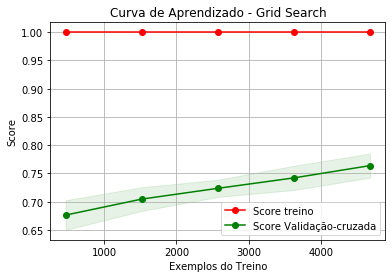

In [5]:
Xtrain, Xtest, Ytrain, Ytest, cvfold = validacao_cruzada(data, target_variable, classifier_variables)
scorer = metrics.make_scorer(metrics.accuracy_score)
estimator = tree.DecisionTreeClassifier(criterion='entropy')
exibir_curva_de_aprendizado(modelDescription, estimator, scorer, Xtrain, Ytrain, cvfold)

### Treinando o Modelo

In [6]:
param_grid = {'Model__max_depth': [4,5,6,8,10,12]}
model_pipe = treinar_modelo_com_grid_search(StandardScaler(), estimator, param_grid, Xtrain, Ytrain, cvfold)
model_pipe

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Model',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                       

### Aplicação do Modelo na Massa de Teste

In [7]:
Yhat, Ypred = aplicar_modelo(model_pipe, Xtest)

Yhat.shape: (1300,)


### Distribuição:

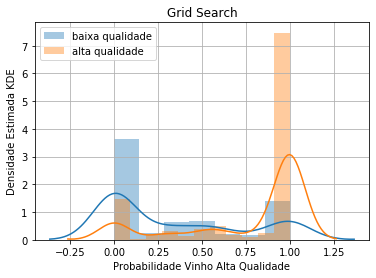

In [8]:
exibir_distribuicao(modelDescription, classes, Yhat, Ytest)

### Curva ROC

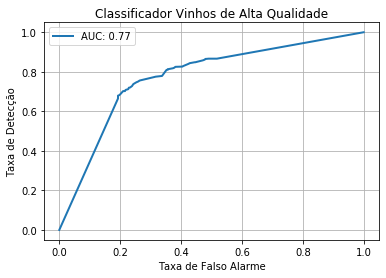

In [9]:
exibirCurvaRoc('Classificador Vinhos de Alta Qualidade', Ytest, Yhat)

### Matriz de Confusão

In [10]:
exibirMatrixDeConfusao(Ytest, Ypred, classes)

,Model baixa qualidade,Model alta qualidade,Real Total
Real baixa qualidade,326,151,477
Real alta qualidade,185,638,823
Model Total,511,789,1300


### Classification Report 

In [11]:
print(metrics.classification_report(Ytest, Ypred, target_names=classes))

                 precision    recall  f1-score   support

baixa qualidade       0.64      0.68      0.66       477
 alta qualidade       0.81      0.78      0.79       823

       accuracy                           0.74      1300
      macro avg       0.72      0.73      0.73      1300
   weighted avg       0.75      0.74      0.74      1300

